<h1 align='center'>Feature Engineering -- Missing Values</h1>
<h2>Random Sample Imputation</h2>

Aim: Random Sample Imputation consist of taking random observations from the dataset and we this observation replace the nan values.

#### When should it be used?

it assumes that the data are missing completely at random(MCAR).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
df['Age'].isnull().sum()

177

In [12]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [14]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [17]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ##It will have the random sample to fill the nan
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state =  0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [18]:
median = df.Age.median()
median

28.0

In [19]:
impute_nan(df, "Age", median)

In [20]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


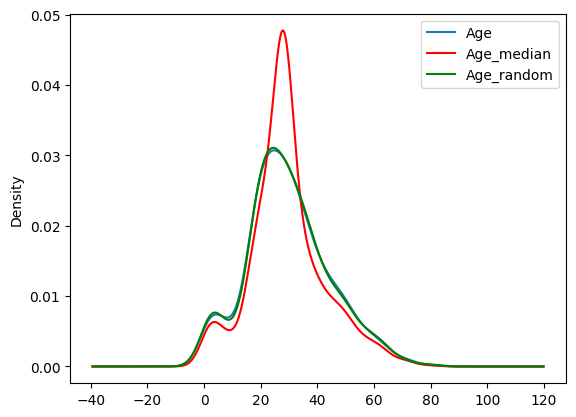

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
df['Age_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
1. Easy to Implement
2. There is less distortion in variance

#### Disadvantage
1. Every situation randomness wont work.